<a href="https://colab.research.google.com/github/Harshai10/Forecasting-Model-by-DS/blob/main/DS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# forecasting - predicting something WRT time using the past and present data

In [4]:
# forcasting-  the vegetable prices
# dataset -

In [6]:
import pandas as pd
df = pd.read_html('/content/DailyWiseMarketArrivals.html')[-1]
df

,Date,Market,Arrival(q),Price Minimum (Rs/q),Price Maximum (Rs/q),Modal Price (Rs/q)
0,01/Jan/2005,BANGALORE,6823,440,580,510
1,03/Jan/2005,BANGALORE,5046,400,560,500
2,05/Jan/2005,BANGALORE,6413,420,560,500
3,06/Jan/2005,BANGALORE,7496,440,550,500
4,07/Jan/2005,BANGALORE,9625,410,460,425
...,...,...,...,...,...,...
4184,08/Jul/2022,BANGALORE,10550,2600,2800,2700
4185,11/Jul/2022,BANGALORE,15870,2600,2800,2700
4186,14/Sep/2022,BANGALORE,9220,1600,2000,1800
4187,17/Sep/2022,BANGALORE,13200,1600,2000,1800


In [7]:
type(df)

pandas.core.frame.DataFrame

In [9]:
df.shape

(4189, 6)

In [10]:
df.size

25134

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4189 entries, 0 to 4188
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Date                  4188 non-null   object
 1   Market                4189 non-null   object
 2   Arrival(q)            4189 non-null   int64 
 3   Price Minimum (Rs/q)  4189 non-null   object
 4   Price Maximum (Rs/q)  4189 non-null   object
 5   Modal Price (Rs/q)    4189 non-null   object
dtypes: int64(1), object(5)
memory usage: 196.5+ KB


In [13]:
# to check the null values
df.isnull().sum()

,0
Date,1
Market,0
Arrival(q),0
Price Minimum (Rs/q),0
Price Maximum (Rs/q),0
Modal Price (Rs/q),0


In [16]:
#now let us drop the null values
df = df.dropna()

In [17]:
df.isnull().sum()

,0
Date,0
Market,0
Arrival(q),0
Price Minimum (Rs/q),0
Price Maximum (Rs/q),0
Modal Price (Rs/q),0


In [20]:
#FB PROPHET- it only take data in form of 2 columns - ds and y - compulsory names
#then we should consider Data and Modal price
# rename data - ds and model price -y
df = df.rename(columns = {'Date':'ds','Modal Price (Rs/q)':'y'})
df

,ds,Market,Arrival(q),Price Minimum (Rs/q),Price Maximum (Rs/q),y
0,01/Jan/2005,BANGALORE,6823,440,580,510
1,03/Jan/2005,BANGALORE,5046,400,560,500
2,05/Jan/2005,BANGALORE,6413,420,560,500
3,06/Jan/2005,BANGALORE,7496,440,550,500
4,07/Jan/2005,BANGALORE,9625,410,460,425
...,...,...,...,...,...,...
4183,04/Jun/2022,BANGALORE,9670,2400,2800,2400
4184,08/Jul/2022,BANGALORE,10550,2600,2800,2700
4185,11/Jul/2022,BANGALORE,15870,2600,2800,2700
4186,14/Sep/2022,BANGALORE,9220,1600,2000,1800


In [21]:
# LET US create a new dataframe and consider only 2 columns ds and y from old dataframe
df1 = df[['ds','y']]
df1

,ds,y
0,01/Jan/2005,510
1,03/Jan/2005,500
2,05/Jan/2005,500
3,06/Jan/2005,500
4,07/Jan/2005,425
...,...,...
4183,04/Jun/2022,2400
4184,08/Jul/2022,2700
4185,11/Jul/2022,2700
4186,14/Sep/2022,1800


In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4188 entries, 0 to 4187
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      4188 non-null   object
 1   y       4188 non-null   object
dtypes: object(2)
memory usage: 227.2+ KB


In [30]:
# the database od the ds column is in object object/string format. convert into datatime format
#the datatype of y column is in the object/string format.convert it in to integer format
df1['ds'] = pd.to_datetime(df1['ds'])
df1['y'] = df1['y'].astype(int)


<ipython-input-30-8333074a6cea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['ds'] = pd.to_datetime(df1['ds'])
<ipython-input-30-8333074a6cea>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['y'] = df1['y'].astype(int)


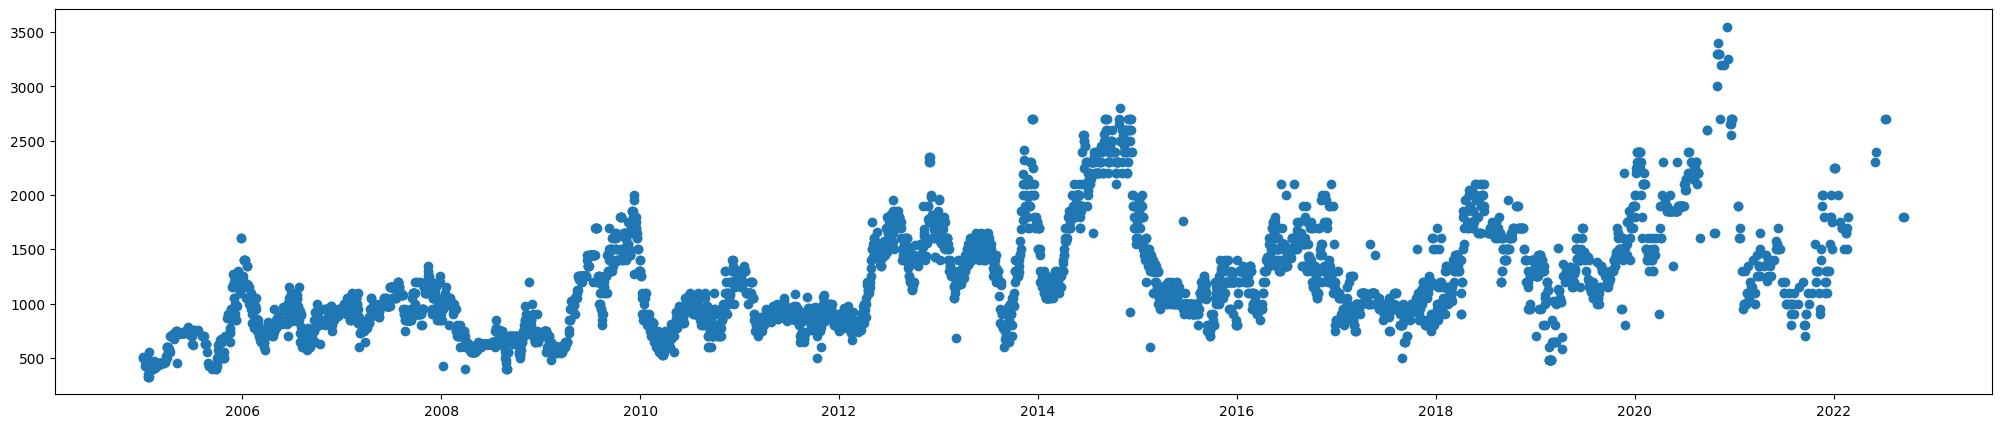

In [37]:
#visualisation
import matplotlib.pyplot as plt
plt.figure(figsize=(25,5))
plt.scatter(df1['ds'],df1['y'])
plt.show()

In [38]:
#fb prophet
import prophet
op = prophet.Prophet()

In [39]:
op.fit(df1) # plotting the values of df1 in fbprophet library


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphreur2ed/72nn4wvv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphreur2ed/x3t6cfnw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28494', 'data', 'file=/tmp/tmphreur2ed/72nn4wvv.json', 'init=/tmp/tmphreur2ed/x3t6cfnw.json', 'output', 'file=/tmp/tmphreur2ed/prophet_modellqglwg21/prophet_model-20241008101959.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:19:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:20:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [41]:
forecast = op.make_future_dataframe(periods=365, freq = 'D')
forecast = op.predict(forecast)

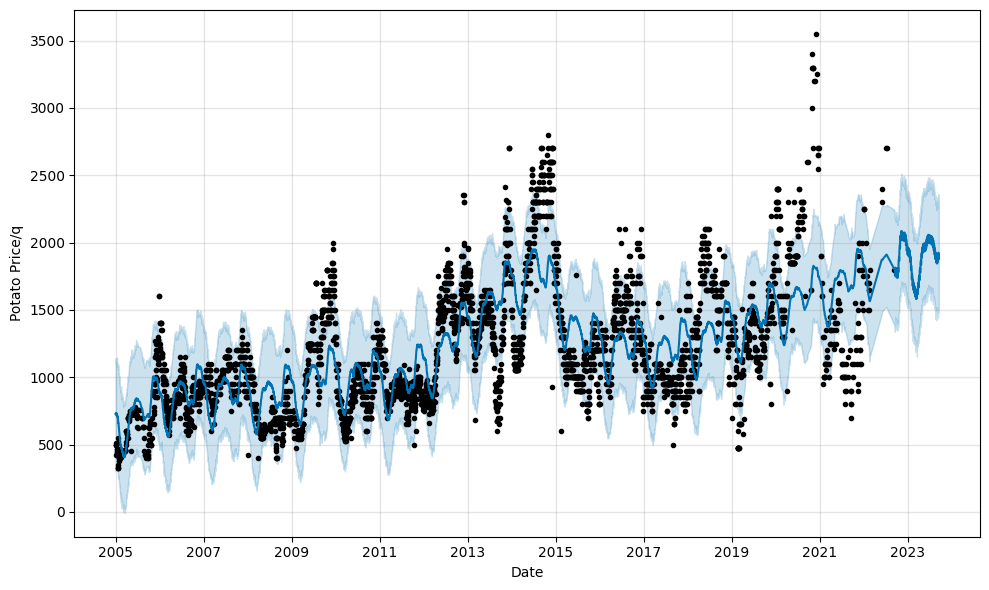

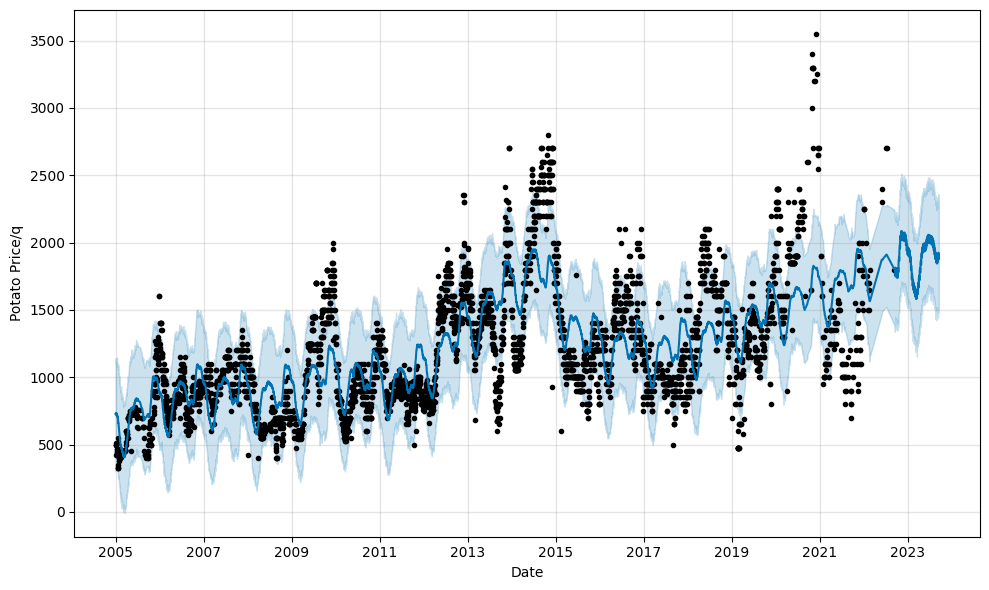

In [43]:
op.plot(forecast,xlabel = 'Date', ylabel = 'Potato Price/q')
#the black dots are the original price
# the light blue shade is minimum and maximum price of potato as predicted by the model
#dark blue line is the best fit line